<a href="https://colab.research.google.com/github/sagarrokad1/LGMVIP-DataScience/blob/main/TASK-7%20Advance%20Level/LGM_VIP_October_2021_TASK_7_Develop_Neura_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

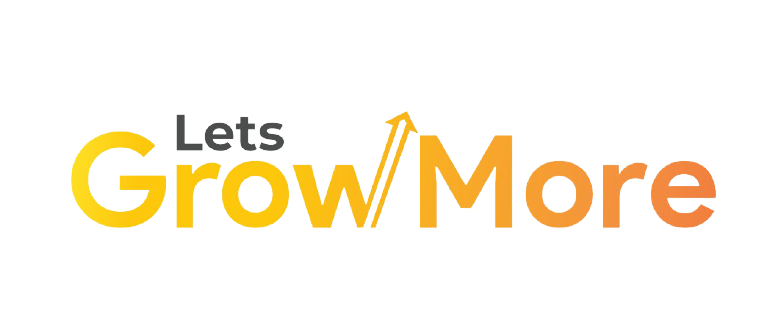


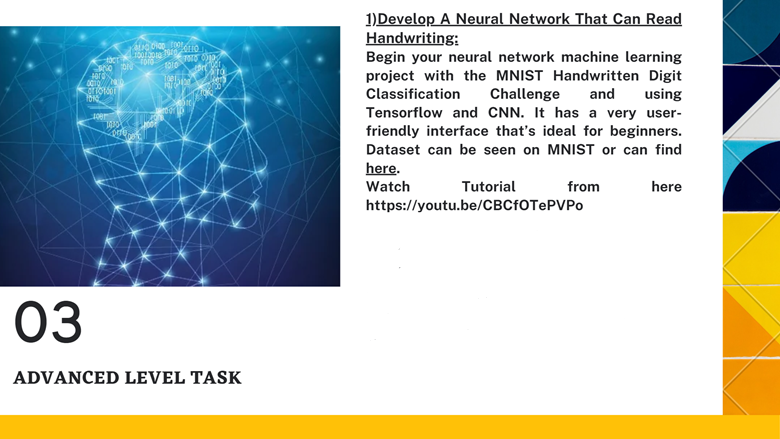


###**Problem Statement:**

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

##**BY : Sagar Rokad**

### **Importing Libraries**

In [ ]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

### **Load Dataset**

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **Reshaping the trainning & testing dataset**

In [ ]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

### **Normalize the value of pixels in images**

In [ ]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

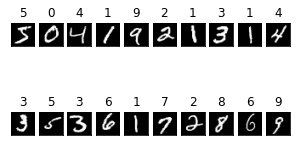

In [ ]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

### **Determine the shape of input image**

In [ ]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

### **Defining the model**

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


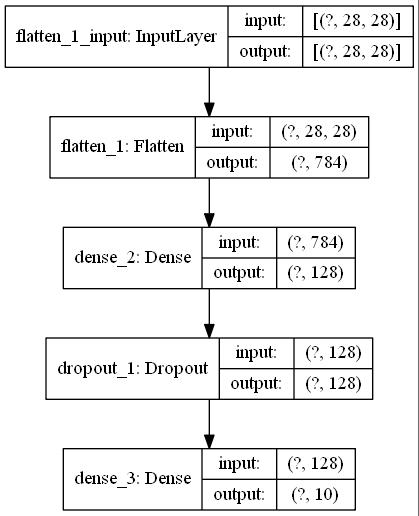

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

In [ ]:
predictions = model(x_train[:1]).numpy()

predictions

array([[ 0.27371222,  0.47162277,  0.3747598 , -0.46385735, -0.43492848,
        -0.5821014 , -1.3636845 ,  0.23854798, -0.55198205,  0.27028313]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.13670266, 0.16662048, 0.15123814, 0.06538144, 0.06730048,
        0.05809006, 0.02658671, 0.13197914, 0.05986631, 0.13623469]],
      dtype=float32)

### **Compiling The Model**

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

### **Train the model**

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1417 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1079 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9758


### **Model Evaluation**

In [ ]:
model.evaluate(x_test,  y_test, verbose=5)

[0.06867513805627823, 0.9782999753952026]

### **Probablity of the model**

In [ ]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.57566304e-08, 6.35131059e-09, 6.90359548e-06, 8.98465660e-05,
        1.74693593e-12, 3.25596687e-07, 1.96594856e-14, 9.99897480e-01,
        1.93118026e-07, 5.08799940e-06],
       [5.48260459e-07, 3.98553530e-05, 9.99949455e-01, 9.16534191e-06,
        6.07382729e-14, 3.57658223e-07, 1.37547659e-07, 3.72162327e-12,
        4.69959360e-07, 3.78994579e-13],
       [4.60307405e-07, 9.99428213e-01, 5.03372357e-05, 3.97218946e-06,
        4.16297917e-05, 1.09022430e-05, 4.15579962e-05, 3.17611499e-04,
        1.04223618e-04, 9.52992650e-07],
       [9.99670029e-01, 1.51429869e-09, 8.72375022e-05, 1.45458657e-07,
        5.23487643e-07, 3.87076057e-07, 3.22720916e-05, 2.28423251e-05,
        1.60378818e-07, 1.86504316e-04],
       [5.65784940e-05, 4.20634505e-09, 3.45380104e-05, 7.70730182e-08,
        9.91323948e-01, 4.90407785e-07, 7.33671695e-05, 1.01801175e-04,
        6.74518105e-06, 8.40242766e-03]], dtype=float32)>

### **Testing the model**

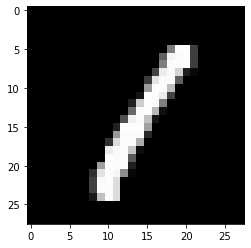

In [ ]:
img = x_train[3]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 1
